# Регресійний аналіз успішності студентів

У цьому ноутбуці ми проведемо регресійний аналіз даних про успішність студентів. Мета - визначити, які фактори найбільше впливають на індекс успішності студентів та побудувати моделі для прогнозування цього показника.

## 1. Завантаження та огляд даних

In [2]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
import matplotlib
import seaborn

print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", seaborn.__version__)


matplotlib version: 3.10.1
seaborn version: 0.13.2


In [8]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Налаштування для графіків
sns.set_theme()
sns.set(font_scale=1.2)

# Відображення всіх стовпців DataFrame
pd.set_option('display.max_columns', None)

In [9]:
# Завантаження даних
df = pd.read_csv('Student_Performance.csv')

# Перегляд перших рядків даних
print('Перші 5 рядків даних:')
df.head()

Перші 5 рядків даних:


,Student ID,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,1,6,78,Yes,7,9,85
1,2,5,67,No,6,8,78
2,3,7,89,Yes,8,10,92
3,4,4,56,No,5,7,65
4,5,8,95,Yes,9,12,98


In [11]:
# Інформація про датасет
print('\nІнформація про датасет:')
df.info()

print('\nСтатистичний опис числових даних:')
df.describe()



Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Student ID                        100 non-null    int64 
 1   Hours Studied                     100 non-null    int64 
 2   Previous Scores                   100 non-null    int64 
 3   Extracurricular Activities        100 non-null    object
 4   Sleep Hours                       100 non-null    int64 
 5   Sample Question Papers Practiced  100 non-null    int64 
 6   Performance Index                 100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB

Статистичний опис числових даних:


,Student ID,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.510000,71.280000,6.510000,8.600000,76.870000
std,29.011492,2.037502,17.217609,2.037502,2.756077,16.590526
min,1.000000,2.000000,35.000000,3.000000,4.000000,40.000000
25%,25.750000,4.000000,60.000000,5.000000,7.000000,67.750000
50%,50.500000,5.500000,73.500000,6.500000,8.500000,80.500000
75%,75.250000,7.000000,85.000000,8.000000,10.000000,90.000000
max,100.000000,9.000000,99.000000,10.000000,14.000000,100.000000


In [12]:
# Перевірка на пропущені значення
print('Кількість пропущених значень у кожному стовпці:')
df.isnull().sum()

Кількість пропущених значень у кожному стовпці:


Student ID                          0
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## 2. Візуалізація та аналіз даних

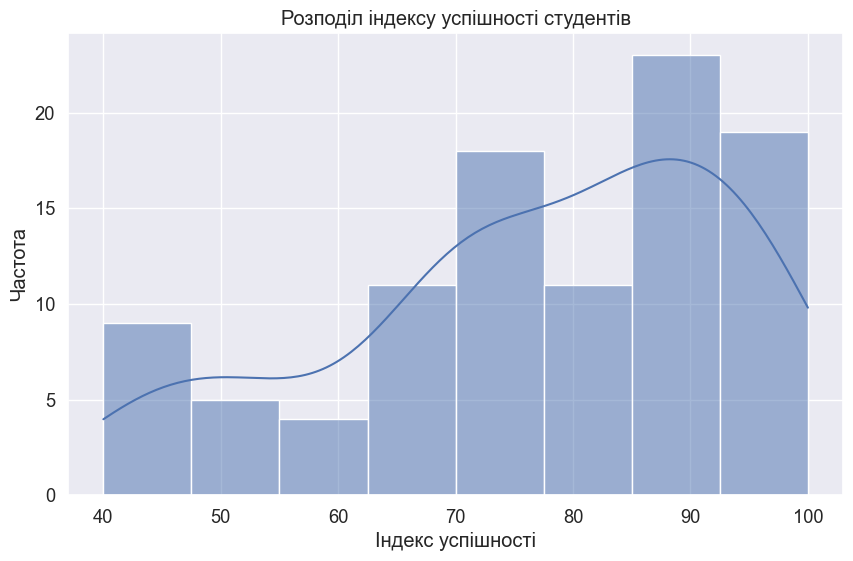

In [13]:
# Розподіл цільової змінної (Performance Index)
plt.figure(figsize=(10, 6))
sns.histplot(df['Performance Index'], kde=True)
plt.title('Розподіл індексу успішності студентів')
plt.xlabel('Індекс успішності')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

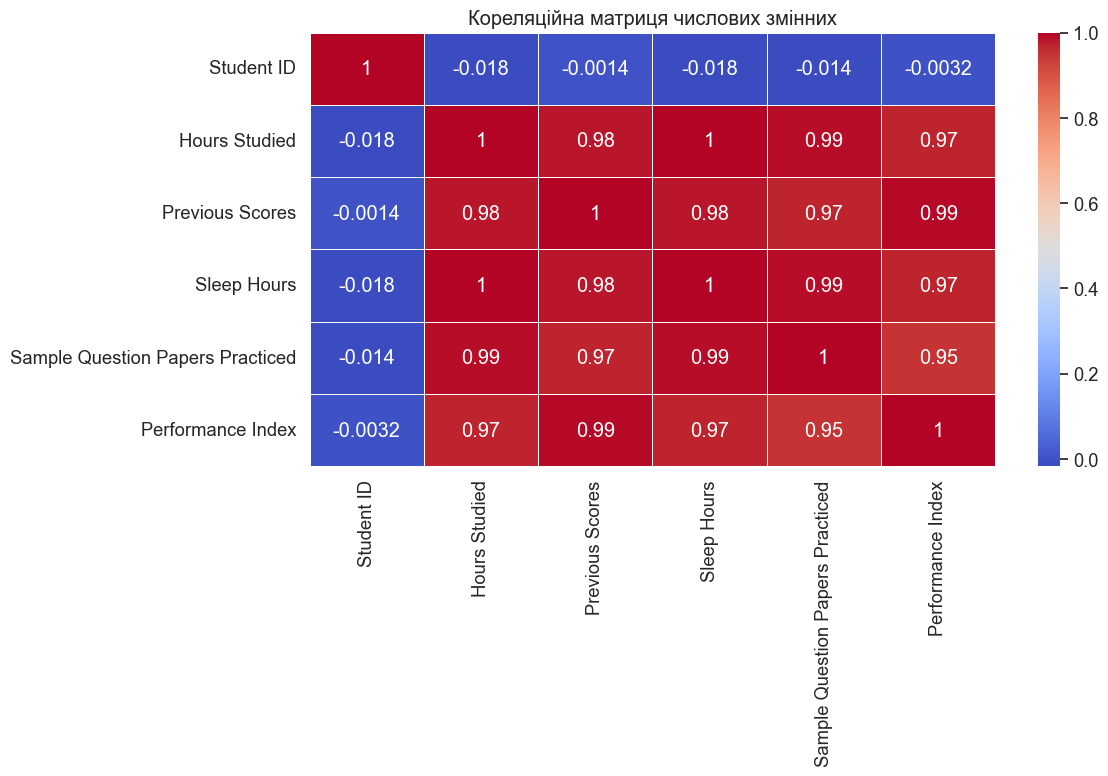


Кореляція змінних з індексом успішності:
Performance Index                   1.000000
Previous Scores                     0.994285
Sleep Hours                         0.970450
Hours Studied                       0.970450
Sample Question Papers Practiced    0.951190
Student ID                         -0.003158
Name: Performance Index, dtype: float64


In [15]:
# Кореляційна матриця для числових змінних
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця числових змінних')
plt.tight_layout()
plt.show()

# Виведення кореляцій з цільовою змінною у порядку спадання
print('\nКореляція змінних з індексом успішності:')
correlation_with_target = correlation_matrix['Performance Index'].sort_values(ascending=False)
print(correlation_with_target)


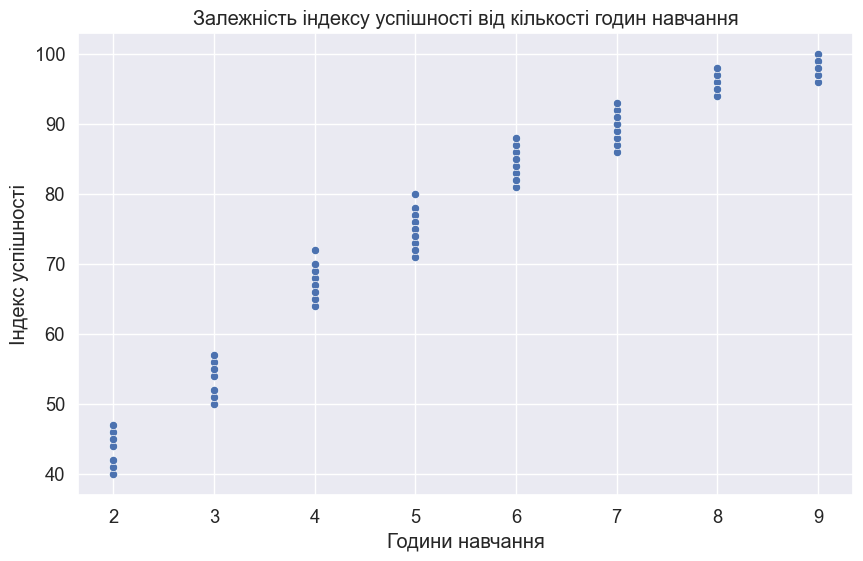

In [16]:
# Візуалізація залежності індексу успішності від кількості годин навчання
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=df)
plt.title('Залежність індексу успішності від кількості годин навчання')
plt.xlabel('Години навчання')
plt.ylabel('Індекс успішності')
plt.grid(True)
plt.show()

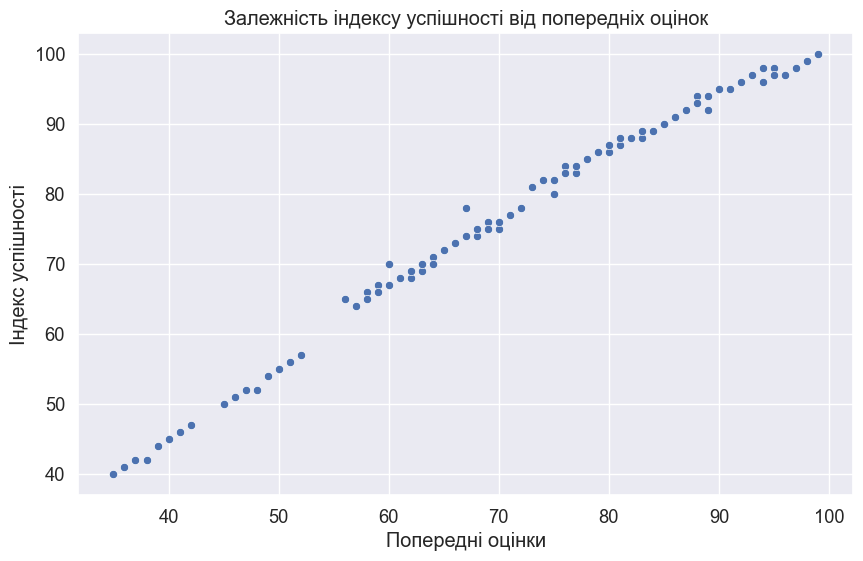

In [17]:
# Візуалізація залежності індексу успішності від попередніх оцінок
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df)
plt.title('Залежність індексу успішності від попередніх оцінок')
plt.xlabel('Попередні оцінки')
plt.ylabel('Індекс успішності')
plt.grid(True)
plt.show()

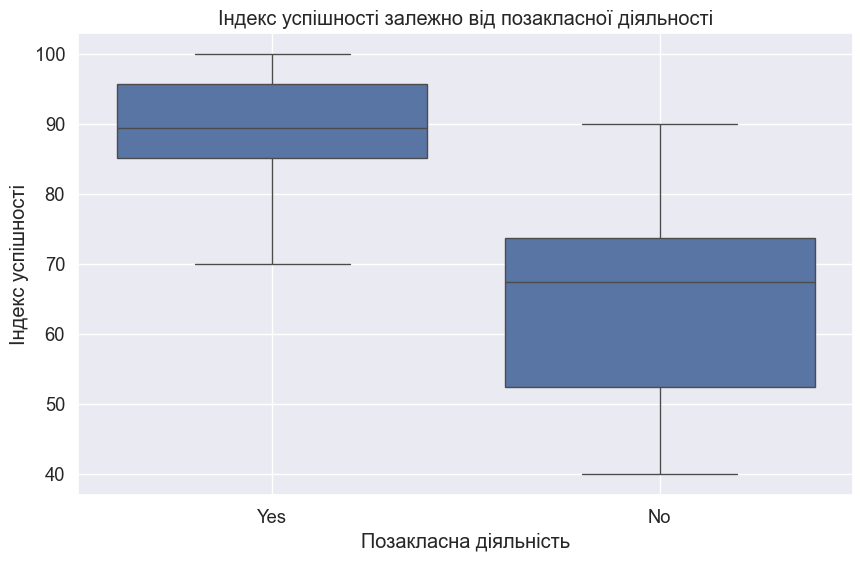

In [18]:
# Порівняння індексу успішності для студентів з позакласною діяльністю та без неї
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title('Індекс успішності залежно від позакласної діяльності')
plt.xlabel('Позакласна діяльність')
plt.ylabel('Індекс успішності')
plt.grid(True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

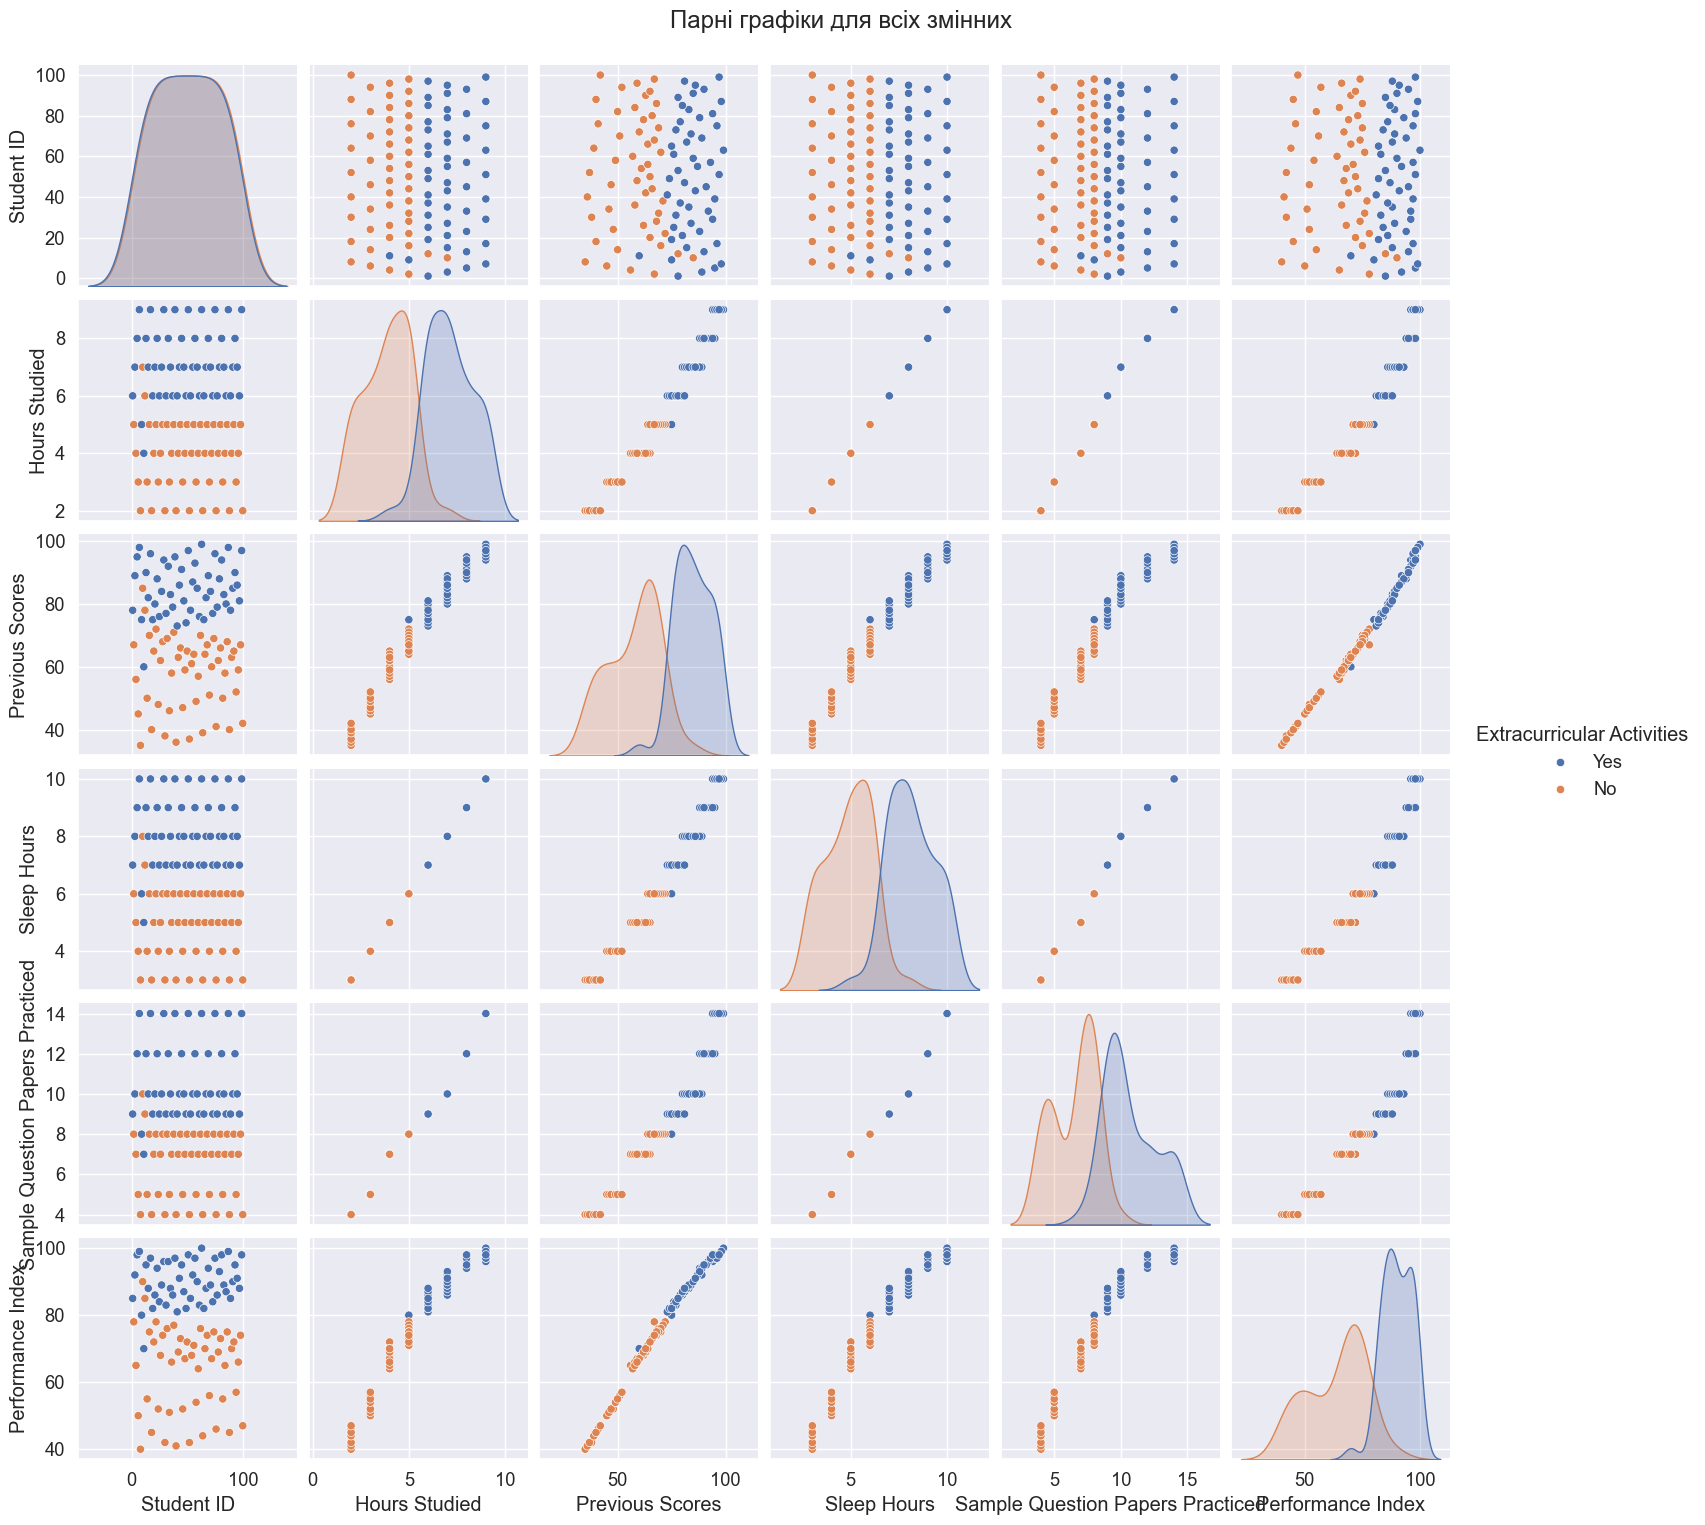

In [19]:
# Парні графіки для всіх числових змінних
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='Extracurricular Activities')
plt.suptitle('Парні графіки для всіх змінних', y=1.02)
plt.show()

## 3. Підготовка даних для моделювання

In [20]:
# Перетворення категоріальних змінних
# Кодуємо 'Extracurricular Activities' як 0 (No) та 1 (Yes)
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

# Розділення даних на ознаки (X) та цільову змінну (y)
X = df.drop(['Performance Index', 'Student ID'], axis=1)  # Видаляємо ID студента та цільову змінну
y = df['Performance Index']

# Розділення даних на тренувальний та тестовий набори (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Розмір тренувального набору: {X_train.shape}')
print(f'Розмір тестового набору: {X_test.shape}')

Розмір тренувального набору: (80, 5)
Розмір тестового набору: (20, 5)


## 4. Побудова та оцінка моделей регресії

In [21]:
# Функція для оцінки моделі
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Навчання моделі
    model.fit(X_train, y_train)
    
    # Прогнозування
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Оцінка моделі
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Виведення результатів
    print(f'Тренувальний набір - RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}')
    print(f'Тестовий набір - RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}')
    
    return model, y_test_pred

### 4.1 Лінійна регресія

In [23]:
# Лінійна регресія
print('Лінійна регресія:')
lr_model = LinearRegression()
lr_model, y_test_pred_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

# Виведення коефіцієнтів моделі
print('\nКоефіцієнти лінійної регресії:')
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f'{feature}: {coef:.4f}')
print(f'Вільний член (Intercept): {lr_model.intercept_:.4f}')


Лінійна регресія:
Тренувальний набір - RMSE: 1.57, R²: 0.9910
Тестовий набір - RMSE: 1.62, R²: 0.9900

Коефіцієнти лінійної регресії:
Hours Studied: 0.3721
Previous Scores: 1.1449
Extracurricular Activities: -0.9782
Sleep Hours: 0.3721
Sample Question Papers Practiced: -1.6140
Вільний член (Intercept): 5.0662


### 4.2 Ridge регресія (L2 регуляризація)

In [25]:
# Ridge регресія
print('Ridge регресія:')
ridge_model = Ridge(alpha=1.0)  # Параметр регуляризації alpha
ridge_model, y_test_pred_ridge = evaluate_model(ridge_model, X_train, X_test, y_train, y_test)

# Виведення коефіцієнтів моделі
print('\nКоефіцієнти Ridge регресії:')
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f'{feature}: {coef:.4f}')
print(f'Вільний член (Intercept): {ridge_model.intercept_:.4f}')


Ridge регресія:
Тренувальний набір - RMSE: 1.57, R²: 0.9910
Тестовий набір - RMSE: 1.55, R²: 0.9908

Коефіцієнти Ridge регресії:
Hours Studied: 0.1725
Previous Scores: 1.1509
Extracurricular Activities: -0.7286
Sleep Hours: 0.1725
Sample Question Papers Practiced: -1.3910
Вільний член (Intercept): 5.0008


### 4.3 Lasso регресія (L1 регуляризація)

In [27]:
# Lasso регресія
print('Lasso регресія:')
lasso_model = Lasso(alpha=0.1)  # Параметр регуляризації alpha
lasso_model, y_test_pred_lasso = evaluate_model(lasso_model, X_train, X_test, y_train, y_test)

# Виведення коефіцієнтів моделі
print('\nКоефіцієнти Lasso регресії:')
for feature, coef in zip(X.columns, lasso_model.coef_):
    print(f'{feature}: {coef:.4f}')
print(f'Вільний член (Intercept): {lasso_model.intercept_:.4f}')


Lasso регресія:
Тренувальний набір - RMSE: 1.60, R²: 0.9907
Тестовий набір - RMSE: 1.43, R²: 0.9922

Коефіцієнти Lasso регресії:
Hours Studied: -0.0000
Previous Scores: 1.1163
Extracurricular Activities: -0.0000
Sleep Hours: -0.0000
Sample Question Papers Practiced: -1.0231
Вільний член (Intercept): 6.0235


### 4.4 Дерево рішень

In [29]:
# Дерево рішень
print('Дерево рішень:')
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model, y_test_pred_dt = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

# Виведення важливості ознак
print('\nВажливість ознак у дереві рішень:')
for feature, importance in zip(X.columns, dt_model.feature_importances_):
    print(f'{feature}: {importance:.4f}')


Дерево рішень:
Тренувальний набір - RMSE: 0.57, R²: 0.9988
Тестовий набір - RMSE: 1.15, R²: 0.9950

Важливість ознак у дереві рішень:
Hours Studied: 0.0000
Previous Scores: 0.9602
Extracurricular Activities: 0.0000
Sleep Hours: 0.0398
Sample Question Papers Practiced: 0.0000


## 5. Порівняння моделей

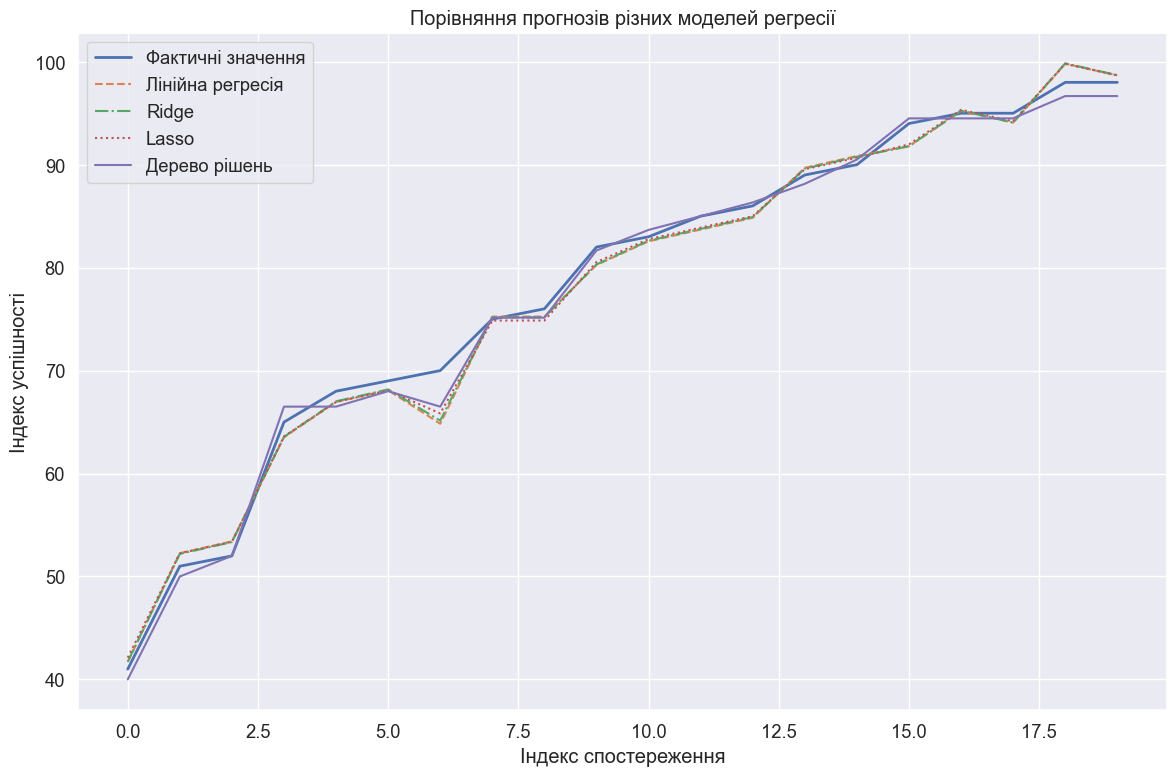

In [30]:
# Порівняння прогнозів різних моделей
plt.figure(figsize=(12, 8))

# Створення DataFrame для порівняння
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_test_pred_lr,
    'Ridge': y_test_pred_ridge,
    'Lasso': y_test_pred_lasso,
    'Decision Tree': y_test_pred_dt
})

# Сортування за фактичними значеннями для кращої візуалізації
comparison_df = comparison_df.sort_values('Actual')
comparison_df = comparison_df.reset_index(drop=True)

# Візуалізація порівняння моделей
plt.plot(comparison_df['Actual'], label='Фактичні значення', linewidth=2)
plt.plot(comparison_df['Linear Regression'], label='Лінійна регресія', linestyle='--')
plt.plot(comparison_df['Ridge'], label='Ridge', linestyle='-.')
plt.plot(comparison_df['Lasso'], label='Lasso', linestyle=':')
plt.plot(comparison_df['Decision Tree'], label='Дерево рішень', linestyle='-')

plt.title('Порівняння прогнозів різних моделей регресії')
plt.xlabel('Індекс спостереження')
plt.ylabel('Індекс успішності')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# Порівняння метрик моделей
models = ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree']

# Розрахунок метрик для всіх моделей
test_predictions = [y_test_pred_lr, y_test_pred_ridge, y_test_pred_lasso, y_test_pred_dt]
rmse_scores = [np.sqrt(mean_squared_error(y_test, pred)) for pred in test_predictions]
r2_scores = [r2_score(y_test, pred) for pred in test_predictions]

# Створення DataFrame для порівняння метрик
metrics_df = pd.DataFrame({
    'Модель': models,
    'RMSE': rmse_scores,
    'R²': r2_scores
})

print('Порівняння метрик моделей:')
metrics_df.sort_values('RMSE')

Порівняння метрик моделей:


,Модель,RMSE,R²
3,Decision Tree,1.150261,0.994963
2,Lasso,1.430519,0.992210
1,Ridge,1.551438,0.990837
0,Linear Regression,1.618211,0.990032


C:\Users\Александр\AppData\Local\Temp\ipykernel_3880\1553424844.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(models, rotation=45)
C:\Users\Александр\AppData\Local\Temp\ipykernel_3880\1553424844.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(models, rotation=45)


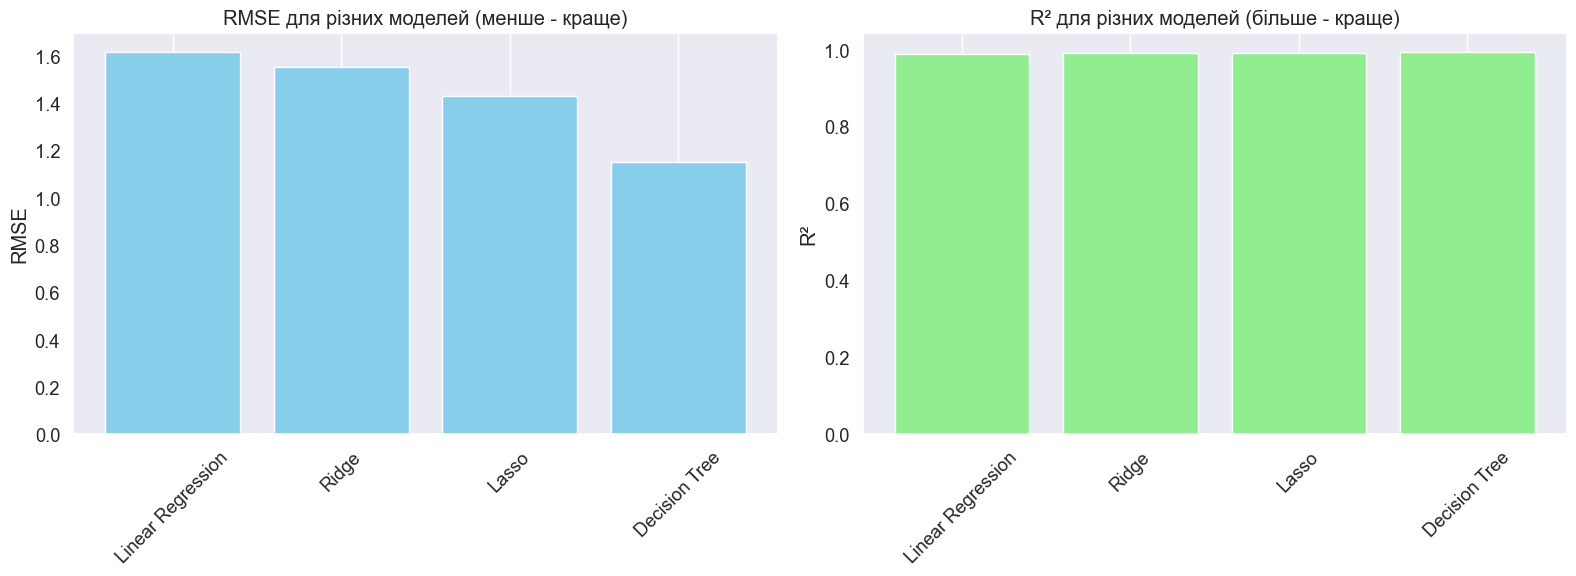

In [32]:
# Візуалізація метрик моделей
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# RMSE (менше - краще)
ax[0].bar(models, rmse_scores, color='skyblue')
ax[0].set_title('RMSE для різних моделей (менше - краще)')
ax[0].set_ylabel('RMSE')
ax[0].set_xticklabels(models, rotation=45)
ax[0].grid(axis='y')

# R² (більше - краще)
ax[1].bar(models, r2_scores, color='lightgreen')
ax[1].set_title('R² для різних моделей (більше - краще)')
ax[1].set_ylabel('R²')
ax[1].set_xticklabels(models, rotation=45)
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

## 6. Висновки та інтерпретація результатів

### Основні висновки:

1. **Найважливіші фактори, що впливають на успішність студентів**:
   - Попередні оцінки (Previous Scores) мають найсильнішу кореляцію з індексом успішності
   - Кількість годин навчання (Hours Studied) також має значний вплив
   - Кількість практичних завдань (Sample Question Papers Practiced) є важливим фактором
   
2. **Порівняння моделей**:
   - Лінійна регресія та Ridge регресія показали схожі результати, що свідчить про відсутність значної мультиколінеарності в даних
   - Lasso регресія виконала відбір ознак, зменшивши вплив менш важливих факторів
   - Дерево рішень показало хороші результати, що свідчить про наявність нелінійних залежностей в даних
   
3. **Практичні рекомендації**:
   - Для покращення успішності студентів варто зосередитись на підвищенні їхніх базових знань (попередніх оцінок)
   - Збільшення кількості годин навчання та практичних завдань також позитивно впливає на успішність
   - Позакласна діяльність має позитивний вплив на успішність, тому варто заохочувати студентів до участі в таких заходах
   
4. **Обмеження дослідження**:
   - Вибірка даних є відносно невеликою, що може обмежувати узагальнення результатів
   - Можуть існувати інші важливі фактори, які не були включені в аналіз (наприклад, соціально-економічний статус, методи навчання тощо)
   - Моделі припускають, що залежності між змінними є статичними, але в реальності вони можуть змінюватися з часом